In [1]:
ls

 Volume in drive E is Data
 Volume Serial Number is A43C-D0BF

 Directory of E:\iiit\Sem3\data_analytics\project_3

18-10-2020  11:45    <DIR>          .
18-10-2020  11:45    <DIR>          ..
18-10-2020  10:36    <DIR>          .ipynb_checkpoints
15-10-2020  19:55    <DIR>          __pycache__
18-10-2020  11:45            16,078 Apriori algorithm.ipynb
18-10-2020  11:24            13,325 apriori using library.ipynb
11-10-2020  22:54           129,454 DA1_ARM_Project.pdf
17-10-2020  13:13            11,234 FP_TREE.ipynb
13-10-2020  20:49         4,168,937 retail_data.txt
15-10-2020  21:43           111,427 temp_data.txt
15-10-2020  19:55             1,948 utils.py
               7 File(s)      4,452,403 bytes
               4 Dir(s)  400,847,364,096 bytes free


In [2]:
import numpy as np
from utils import *

In [3]:
data_path=r'E:\iiit\Sem3\data_analytics\project_3\retail_data.txt'

In [4]:
min_support=0.05
min_confidence=0.05

In [5]:
transactions=load_transaction(data_path)
num_transactions=len(transactions)

88162it [00:01, 73714.10it/s]


In [6]:
mx=-1
for t in transactions:
    if mx < max(t):
        mx=max(t)

In [7]:
order=[i for i in range(1,mx+1)]

In [8]:
C={}
L={}
itemset_size=1
Discarded={itemset_size:[]}
C.update({itemset_size : [[f] for f in order]})

In [9]:
support_count_L={}
f,sup,new_discarded=get_frequent(C[itemset_size],transactions,min_support,Discarded)
Discarded.update({itemset_size:new_discarded})
L.update({itemset_size:f})
support_count_L.update({itemset_size:sup})

100%|████████████████████████████████████████████████████████████████████████████| 16470/16470 [21:44<00:00, 12.63it/s]


In [10]:
def print_table(T,supp_count):
    print('Itemset | Frequency')
    for k in range(len(T)):
        print(f'{T[k]}  :  {supp_count[k]}')
    print('\n\n')

In [11]:
print('L1: \n')
print_table(L[1],support_count_L[1])

L1: 

Itemset | Frequency
[33]  :  15167
[39]  :  15596
[40]  :  50675
[42]  :  14945
[49]  :  42135
[66]  :  4472





In [12]:
k=itemset_size+1
convergence=False

while convergence==False:
    C.update({k : join_set_itemsets(L[k-1],order)})
    print(f'Table C{k} \n ')
    print_table(C[k],[count_occurances(it,transactions) for it in C[k]])
    f,sup,new_discarded=get_frequent(C[k],transactions,min_support,Discarded)
    Discarded.update({k : new_discarded})
    L.update({k : f})
    support_count_L.update({k : sup})
    
    if len(L[k])==0:
        convergence=True
    else:
        print(f'Table L{k} \n ')
        print_table(L[k],support_count_L[k])
        
    k+=1

Table C2 
 


 13%|███████████                                                                        | 2/15 [00:00<00:01, 11.24it/s]

Itemset | Frequency
[33, 39]  :  2833
[33, 40]  :  8455
[33, 42]  :  3196
[33, 49]  :  8034
[33, 66]  :  774
[39, 40]  :  10345
[39, 42]  :  3897
[39, 49]  :  7944
[39, 66]  :  643
[40, 42]  :  11414
[40, 49]  :  29142
[40, 66]  :  2787
[42, 49]  :  9018
[42, 66]  :  995
[49, 66]  :  2529





100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:01<00:00, 10.86it/s]


Table L2 
 
Itemset | Frequency
[33, 40]  :  8455
[33, 49]  :  8034
[39, 40]  :  10345
[39, 49]  :  7944
[40, 42]  :  11414
[40, 49]  :  29142
[42, 49]  :  9018



Table C3 
 
Itemset | Frequency
[33, 40, 49]  :  5402
[39, 40, 49]  :  6102
[40, 42, 49]  :  7366





100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.87it/s]
0it [00:00, ?it/s]

Table L3 
 
Itemset | Frequency
[33, 40, 49]  :  5402
[39, 40, 49]  :  6102
[40, 42, 49]  :  7366



Table C4 
 
Itemset | Frequency





GENERATING ASSOCIATION RULES

In [17]:
from itertools import combinations,chain
def powerset(s):
    return list(chain.from_iterable(combinations(s,r) for r in range(1,len(s)+1)))

In [18]:
def write_rules(X,X_S,S,confidence,support_x,lift,num_transactions):
    out_rules=""
    out_rules+=f'Frequent Itemset {X}'
    out_rules+=f'      Rule {list(S)} ---> {list(X_S)}'
    out_rules+='      Confidence {0:2.3f}'.format(confidence)
    out_rules+='      Support {0:2.3f}'.format(support_x/num_transactions)
    out_rules+='      Lift {0:2.3f}\n'.format(lift)
    return out_rules

In [19]:
association_rules=""
for i in range(1,len(L)):
    for j in range(len(L[i])):
        s = powerset(set(L[i][j]))
        s.pop()#remove subset with all the items
        for z in s:
            S = set(z)
            X=set(L[i][j])
            X_S=set(X-S)
            
            support_x=count_occurances(X,transactions)
            support_x_s=count_occurances(X_S,transactions)
            
            confidence=support_x / support_x_s
            lift=confidence/(count_occurances(S,transactions)/num_transactions)
            
            if support_x >= min_support:
                association_rules+=write_rules(X,X_S,S,confidence,support_x,lift,num_transactions)
                
                

In [20]:
print(association_rules)

Frequent Itemset {40, 33}      Rule [40] ---> [33]      Confidence 0.557      Support 0.096      Lift 0.970
Frequent Itemset {40, 33}      Rule [33] ---> [40]      Confidence 0.167      Support 0.096      Lift 0.970
Frequent Itemset {33, 49}      Rule [33] ---> [49]      Confidence 0.191      Support 0.091      Lift 1.108
Frequent Itemset {33, 49}      Rule [49] ---> [33]      Confidence 0.530      Support 0.091      Lift 1.108
Frequent Itemset {40, 39}      Rule [40] ---> [39]      Confidence 0.663      Support 0.117      Lift 1.154
Frequent Itemset {40, 39}      Rule [39] ---> [40]      Confidence 0.204      Support 0.117      Lift 1.154
Frequent Itemset {49, 39}      Rule [49] ---> [39]      Confidence 0.509      Support 0.090      Lift 1.066
Frequent Itemset {49, 39}      Rule [39] ---> [49]      Confidence 0.189      Support 0.090      Lift 1.066
Frequent Itemset {40, 42}      Rule [40] ---> [42]      Confidence 0.764      Support 0.129      Lift 1.329
Frequent Itemset {40, 42}   

In [ ]:
from itertools import combinations,chain

class Apriori:
    def __init__(self,min_support,min_confidence):
        self.min_support=min_support
        self.min_confidence=min_confidence
        self.order=None
        self.transactions=None
        self.num_transactions=None
        self.Candidates={}
        self.Itemsets={}
        self.Itemset_support_counts={}
        self.Discarded_itemsets={}
        self.order=None
        self.frequent_itemsets={}
        self.itemsets_rules=[]
        self.itemset_supports=[]
        self.freq_itemsets=[]

    
    def count_itemset_occurance(self,itemsets,transactions):
        count=0
        for i in range(len(transactions)):
            if set(itemsets).issubset(set(transactions[i]):
                count+=1
        return count
    
    def merge(self,itemset1,itemset2):
        itemset1.sort(key=lambda val : self.order.index(val))
        itemset2.sort(key=lambda val : self.order.index(val))
    
        for i in range(len(itemset1)-1):
            if itemset1[i]!=itemset2[i]:
                return []

        if self.order.index(itemset1[-1]) < self.order.index(itemset2[-1]):
            return itemset1+[itemset2[-1]]
        return []
    
    def join_itemsets(self,set_of_itemsets):
        Candidates=[]
        for i in range(len(set_of_itemsets)):
            for j in range(i+1,len(set_of_itemsets)):
                itemsets_out=self.merge(set_of_itemsets[i],set_of_itemsets[j])
                if len(itemsets_out)>0:
                    Candidates.append(itemsets_out)
        return Candidates
    
    def get_freuqent_itemsets(self,itemsets,transactions,minimum_support,previously_discarded):
        L=[]
        supp_count=[]
        new_discarded=[]

        num_transactions=len(transactions)

        k=len(previously_discarded.keys())

        for s in tqdm(range(len(itemsets))):
            discarded_before=False

            if(k > 0):
                for item in previously_discarded[k]:
                    if(set(item).issubset(set(itemsets[s]))):
                        discarded_before=True
                        break

            if not discarded_before:
                count=self.count_itemset_occurance(itemsets[s],transactions)
                if count/num_transactions >=minimum_support:
                    L.append(itemsets[s])
                    supp_count.append(count)
                else:
                    new_discarded.append(itemsets[s])

        return L,supp_count,new_discarded
    
    def get_order(self,transactions):
        mx=-1
        for t in transactions:
            if mx < max(t):
                mx=max(t)
        return mx
    
    def print_table(self,T,supp_count):
        print('Itemset | Frequency')
        for k in range(len(T)):
            print(f'{T[k]}  :  {supp_count[k]}')
        print('\n\n')
    
    def update_tables(self,itemset_size,frequency,support_count,new_discarded): 
        self.Discarded_itemsets.update({itemset_size:new_discarded})
        self.Itemsets.update({itemset_size:frequency})
        self.Itemset_support_counts.update({itemset_size:support_count})

    
    def init(self,transactions):
        self.order=[i for i in range(1,self.get_order(transactions)+1)]
        itemset_size=1
        
        self.Discarded_itemsets={itemset_size:[]}
        self.Candidates.update({itemset_size : [[f] for f in self.order]})
        
        frequency,support_count,new_discarded=self.get_freuqent_itemsets(self.Candidates[itemset_size],transactions,self.min_support,self.Discarded_itemsets)    
        
        self.update_tables(itemset_size,frequency,support_count,new_discarded)
        
        
    def powerset(self,s):
        return list(chain.from_iterable(combinations(s,r) for r in range(1,len(s)+1)))
    
    def generate_itemset_frequency(self,verbose):
        k=2
        convergence=False

        while convergence==False:
            self.Candidates.update({k : self.join_itemsets(self.Itemsets[k-1])})
            
            if(verbose==1):
                print(f'Table Candidates {k} \n ')
                self.print_table(self.Candidates[k],[self.count_itemset_occurance(it,self.transactions) for it in self.Candidates[k]])
            
            frequency,support_count,new_discarded=self.get_freuqent_itemsets(self.Candidates[k],
                                                                    self.transactions,self.min_support,self.Discarded_itemsets)
            
            self.update_tables(k,frequency,support_count,new_discarded)

            if len(self.Itemsets[k])==0:
                convergence=True
            else:
                print(f'Table Itemsets {k} \n ')
                self.print_table(self.Itemsets[k],self.Itemset_support_counts[k])

            k+=1
    
    def create_rule_set(self,itemset,rule_rhs,rule_lhs,confidence,itemset_support):
        self.freq_itemsets.append(itemset)
        rule=f'{list(rule_lhs)} --> {list(rule_rhs)}'
        self.itemsets_rules.append(rule)
        self.itemset_supports.append(float(itemset_support/self.num_transactions))
    
    
    def generate_association_rules(self):
        association_rules=""
        for i in range(1,len(self.Itemsets)):
            for j in range(len(self.Itemsets[i])):
                s = self.powerset(set(self.Itemsets[i][j]))
                
                s.pop()#remove subset with all the items
                for z in s:
                    S = set(z)
                    X=set(self.Itemsets[i][j])
                    X_S=set(X-S)

                    support_x=self.count_itemset_occurance(X,self.transactions)
                    support_x_s=self.count_itemset_occurance(X_S,self.transactions)

                    confidence=support_x / support_x_s

                    if support_x >= self.min_support:
                        self.create_rule_set(X,X_S,S,confidence,support_x)

    
    def fit_transform(self,transactions,verbose=0):
        self.transactions=transactions
        self.num_transactions=len(self.transactions)    
        
        self.init(self.transactions)
        
        if(verbose==1):
            self.print_table(self.Itemsets[1],self.Itemset_support_counts[1])
    
        
        self.generate_itemset_frequency(verbose)
        
        self.generate_association_rules()
        
        self.frequent_itemsets={'Itemset':self.freq_itemsets,'Rule':self.itemsets_rules,'Support':self.itemset_supports}
        return pd.DataFrame(self.frequent_itemsets)

In [2]:
from tqdm import tqdm
import numpy as np
from collections import defaultdict
import operator

In [66]:
#Simple apriori for k=3
def load_transaction(data_path,type_=None):
        transactions=[]
        with open(data_path,'r') as data_file:
            for lines in tqdm(data_file):
                if(type_==2):
                    transactions_list=list(lines.strip('-2\n').split('-1'))
                else:
                    transactions_list=list(lines.strip().split())
                
                transactions_list=[int(x) for x in transactions_list if x is not ' ']

                transactions_list=list(np.unique(transactions_list))
                transactions_list.sort()
                transactions.append(transactions_list)

        return transactions


In [68]:
# transactions=load_transaction('retail_data.txt')

In [69]:
transactions=load_transaction('bwv_data_2.txt',2)

77512it [00:00, 82372.34it/s]


In [73]:
# freq_comm2=defaultdict(int)
# for trans in new_transactions:
#     for item in trans:
#         freq_comm2[item]+=1

In [71]:
len(freq_comm2)

0

In [72]:
top_items2=sorted(freq_comm2.items(),key=operator.itemgetter(1),reverse=True)

In [62]:
frequency_freq2=defaultdict(int)
for item in top_items2:
    frequency_freq2[item[1]]+=1

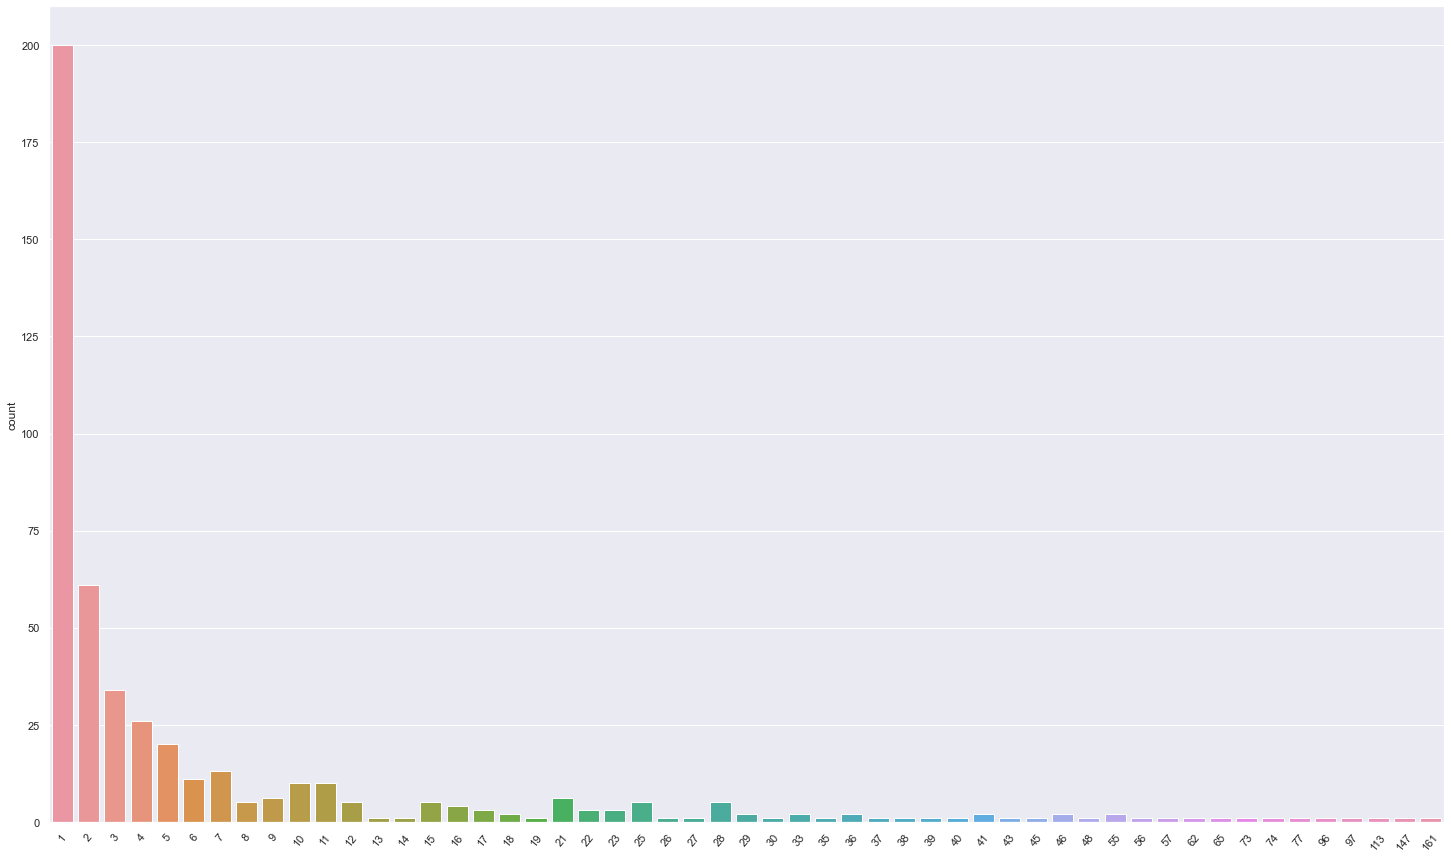

In [63]:
x = list(frequency_freq2.values())
plt.figure(figsize=(25,15))
ax = sns.countplot(x)
ax.set_xticklabels(ax.get_xticklabels(),rotation=50)
plt.show()

In [5]:
freq_comm=defaultdict(int)
for trans in transactions:
    for item in trans:
        freq_comm[item]+=1

In [10]:
top_items=sorted(freq_comm.items(),key=operator.itemgetter(1),reverse=True)

In [13]:
frequency_freq=defaultdict(int)

In [15]:
for item in top_items:
    frequency_freq[item[1]]+=1

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [79]:
np.unique(list(frequency_freq.items()),return_counts=True)

(array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
           10,    11,    12,    13,    14,    15,    16,    17,    18,
           19,    20,    21,    22,    23,    24,    25,    26,    27,
           28,    29,    30,    31,    32,    33,    34,    35,    36,
           37,    38,    39,    40,    41,    42,    43,    44,    45,
           46,    47,    48,    49,    50,    51,    52,    53,    54,
           55,    56,    57,    58,    59,    60,    61,    62,    63,
           64,    65,    66,    67,    68,    69,    70,    71,    72,
           73,    74,    75,    76,    77,    78,    79,    80,    81,
           82,    83,    84,    85,    86,    87,    88,    89,    90,
           91,    92,    93,    94,    95,    96,    97,    98,    99,
          100,   101,   102,   103,   104,   105,   106,   107,   108,
          109,   110,   111,   112,   113,   114,   115,   116,   117,
          118,   119,   120,   121,   122,   123,   124,   125,   126,
      

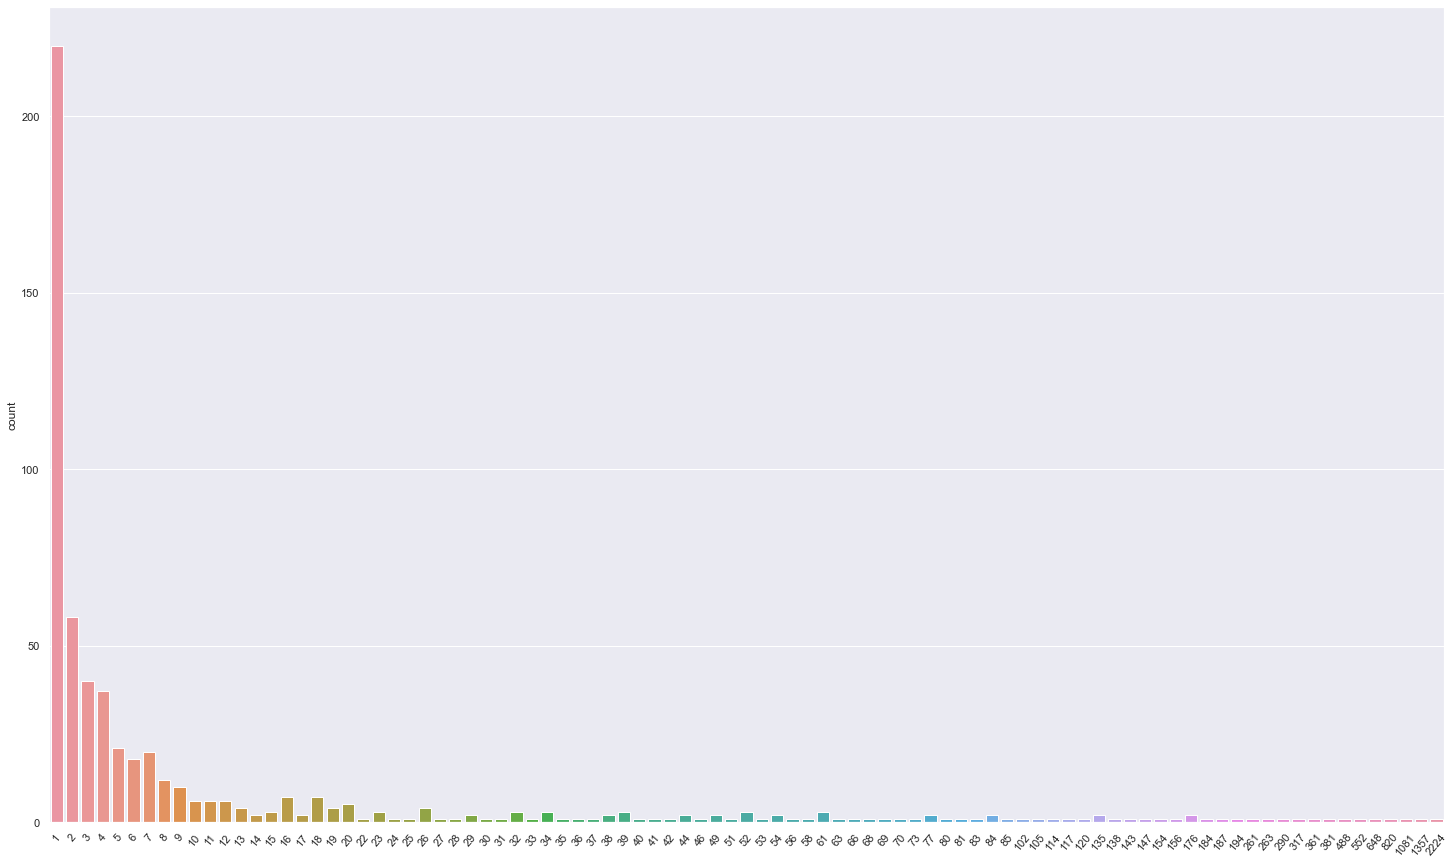

In [32]:
x = list(frequency_freq.values())
plt.figure(figsize=(25,15))
ax = sns.countplot(x)
ax.set_xticklabels(ax.get_xticklabels(),rotation=50)
plt.show()

In [83]:
len(list(frequency_freq.values()))

583

In [4]:
import numpy as np
from collections import defaultdict
import pandas as pd
from tqdm import tqdm
import operator

In [5]:
class improved_apriori:
    def __init__(self):
        self.one_item_frequency=defaultdict(int)
        self.candidate_itemset_pairs=defaultdict(int)
        self.candidate_itemset_triples=defaultdict(int)
        
        self.frequent_one_itemsets=defaultdict(int)
        self.frequent_itemset_pairs=defaultdict(int)
        self.frequent_itemset_triples=defaultdict(int)
        
        self.min_support=None
        self.min_support_frequency=None
        self.transactions=None
        
        self.final_frequent_itemsets=defaultdict(int)
    
    def merge_itemsets(self,*itemsets):
        return str(sorted(itemsets))
    
    def create_pairsets(self,*itemsets):
        pairs=[]
        for index1 in range(len(itemsets)-1):
            for index2 in range(index1+1,len(itemsets)):
                pairs.append(self.merge_itemsets(itemsets[index1],itemsets[index2]))
        return pairs
    
    def find_one_frequent_candidates(self):
        for transaction in self.transactions:
            for item in transaction:
                self.one_item_frequency[item]+=1

    def find_one_frequent_itemsets(self):
        for item in self.one_item_frequency.keys():
            if(self.one_item_frequency[item] >= self.min_support_frequency):
                self.frequent_one_itemsets[item]=self.one_item_frequency[item]
    
    def find_two_frequent_candidates(self):
        for transaction in tqdm(self.transactions):
            for index1 in range(len(transaction)-1):
                if(transaction[index1] not in self.frequent_one_itemsets):
                    continue
                for index2 in range(index1+1,len(transaction)):
                    if(transaction[index2] not in self.frequent_one_itemsets):
                        continue 
                    candidate_pair=self.merge_itemsets(transaction[index1],transaction[index2])
                    self.candidate_itemset_pairs[candidate_pair]+=1
                    
    def find_two_frequent_itemsets(self):
        for item_pair in self.candidate_itemset_pairs.keys():
            if(self.candidate_itemset_pairs[item_pair] > self.min_support_frequency):
                self.frequent_itemset_pairs[item_pair]=self.candidate_itemset_pairs[item_pair]
    
    def find_three_frequent_candidates(self):
        for transaction in tqdm(self.transactions):
            for index1 in range(len(transaction)-2):
                if(transaction[index1] not in self.frequent_one_itemsets):
                    continue
                for index2 in range(index1+1,len(transaction)-1):
                    if(transaction[index2] not in self.frequent_one_itemsets):
                        continue 
                    pair1=self.merge_itemsets(transaction[index1],transaction[index2])
                    if pair1 not in self.frequent_itemset_pairs:
                        continue

                    for index3 in range(index2+1,len(transaction)):
                        if(transaction[index3] not in self.frequent_one_itemsets):
                            continue

                        all_pairs=self.create_pairsets(transaction[index1],
                                                 transaction[index2],
                                                 transaction[index3])
                        for pair in all_pairs:
                            if(pair not in self.frequent_itemset_pairs):
                                continue
                                
                        itemset_triple=self.merge_itemsets(transaction[index1],
                                                 transaction[index2],
                                                 transaction[index3])

                        self.candidate_itemset_triples[itemset_triple]+=1


    def find_three_frequent_itemsets(self):
        for itemset in self.candidate_itemset_triples.keys():
            if(self.candidate_itemset_triples[itemset] > self.min_support_frequency):
                self.frequent_itemset_triples[itemset]=self.candidate_itemset_triples[itemset]
                
    def find_final_frequent_itemsets(self):
        
        for itemset,freq in self.frequent_one_itemsets.items():
            self.final_frequent_itemsets[itemset]=freq

        for itemset,freq in self.frequent_itemset_pairs.items():
            self.final_frequent_itemsets[itemset]=freq

        for itemset,freq in self.frequent_itemset_triples.items():
            self.final_frequent_itemsets[itemset]=freq
            
        final=sorted(self.final_frequent_itemsets.items(),key=operator.itemgetter(1))
        return final
        
    def fit_transform(self,transaction,min_support=0.1):
        self.transactions=transactions
        self.min_support=min_support
        self.min_support_frequency=self.min_support*len(self.transactions)
        
        self.find_one_frequent_candidates()
        self.find_one_frequent_itemsets()
        
        self.find_two_frequent_candidates()
        self.find_two_frequent_itemsets()
        
        self.find_three_frequent_candidates()
        self.find_three_frequent_itemsets()
        
        final_results=self.find_final_frequent_itemsets()
        
        final_results=np.array(final_results)
        
        if(len(final_results)>0):
            final_dict={'Itemset': final_results[:,0], 'Frequency' : final_results[:,1].astype('int32')}
        
            final_df=pd.DataFrame(final_dict)
            return final_df
        else:
            return 'No Itemsets for given threshold'

In [6]:
#Simple apriori for k=3
def load_transaction(data_path,type_=None):
        transactions=[]
        with open(data_path,'r') as data_file:
            for lines in tqdm(data_file):
                if(type_==2):
                    transactions_list=list(lines.strip('-2\n').split('-1'))
                else:
                    transactions_list=list(lines.strip().split())
                
                transactions_list=[int(x) for x in transactions_list if x is not ' ']

                transactions_list=list(np.unique(transactions_list))
                transactions_list.sort()
                transactions.append(transactions_list)

        return transactions


In [7]:
transactions=load_transaction('bwv_data_2.txt',2)

77512it [00:00, 80913.17it/s]


In [38]:
iap=improved_apriori()
hash_res=iap.fit_transform(transactions,0.04)

100%|███████████████████████████████████████████████████████| 77512/77512 [00:00<00:00, 1191874.84it/s]


In [40]:
hash_results.values

array([[55323,  3417],
       [55267,  3766]])

In [10]:
min_thresh=[0.001, 0.01, 0.05, 0.1, 0.5, 1]
time_taken_hash=[]

In [11]:
from time import time

In [12]:
for thresh in min_thresh:
    print(thresh)
    iap=improved_apriori()
    start=time()
    iap.fit_transform(transactions,thresh)
    end=time()
    time_taken_hash.append(end-start)

  7%|████                                                      | 5442/77512 [00:00<00:01, 54419.66it/s]

0.001


 54%|██████████████████████████████▏                         | 41801/77512 [00:00<00:00, 214281.77it/s]

0.01


100%|███████████████████████████████████████████████████████| 77512/77512 [00:00<00:00, 1230326.63it/s]


0.05
0.1


100%|███████████████████████████████████████████████████████| 77512/77512 [00:00<00:00, 1123381.63it/s]

0.5



100%|███████████████████████████████████████████████████████| 77512/77512 [00:00<00:00, 1269867.32it/s]

1


In [13]:
time_taken_hash

[18.459999799728394,
 1.5090014934539795,
 0.19800019264221191,
 0.18999862670898438,
 0.2090005874633789,
 0.2016148567199707]

In [14]:
from itertools import combinations,chain
from tqdm import tqdm
import numpy as np
from collections import defaultdict
import pandas as pd

class Apriori:
    def __init__(self,min_support,min_confidence):
        self.min_support=min_support
        self.min_confidence=min_confidence
        self.order=None
        self.transactions=None
        self.num_transactions=None
        self.Candidates={}
        self.Itemsets={}
        self.Itemset_support_counts={}
        self.Discarded_itemsets={}
        self.order=None
        self.frequent_itemsets={}
        self.itemset_supports=[]
        self.freq_itemsets=[]

    
    def count_itemset_occurance(self,itemsets,transactions):
        count=0
        for i in range(len(transactions)):
            if set(itemsets).issubset(set(transactions[i])):
                count+=1
        return count
    
    def merge(self,itemset1,itemset2):
        itemset1.sort(key=lambda val : self.order.index(val))
        itemset2.sort(key=lambda val : self.order.index(val))
    
        for i in range(len(itemset1)-1):
            if itemset1[i]!=itemset2[i]:
                return []

        if self.order.index(itemset1[-1]) < self.order.index(itemset2[-1]):
            return itemset1+[itemset2[-1]]
        return []
    
    def join_itemsets(self,set_of_itemsets):
        Candidates=[]
        for i in range(len(set_of_itemsets)):
            for j in range(i+1,len(set_of_itemsets)):
                itemsets_out=self.merge(set_of_itemsets[i],set_of_itemsets[j])
                if len(itemsets_out)>0:
                    Candidates.append(itemsets_out)
        return Candidates
    
    def get_freuqent_itemsets(self,itemsets,transactions,minimum_support,previously_discarded):
        supp_count=[]
        new_discarded=[]
        itemsets_list=list()
        num_transactions=len(transactions)

        k=len(previously_discarded)

        for s in tqdm(range(len(itemsets))):
            discarded_before=False

            if(k > 0):
                for item in previously_discarded[k]:
                    if(set(item).issubset(set(itemsets[s]))):
                        discarded_before=True
                        break

            if not discarded_before:
                count=self.count_itemset_occurance(itemsets[s],transactions)
                current_support=count/num_transactions
                if current_support >=minimum_support:
                    itemsets_list.append(itemsets[s])
                    supp_count.append(count)
                else:
                    new_discarded.append(itemsets[s])

        return itemsets_list,supp_count,new_discarded
    
    def get_order(self,transactions):
        mx=-1
        for t in transactions:
            if mx < max(t):
                mx=max(t)
        return mx
    
    def print_table(self,T,supp_count):
        print('Itemset | Frequency')
        for k in range(len(T)):
            print(f'{T[k]}  :  {supp_count[k]}')
        print('\n\n')
    
    def update_tables(self,itemset_size,frequency,support_count,new_discarded): 
        self.Discarded_itemsets.update({itemset_size:new_discarded})
        self.Itemsets.update({itemset_size:frequency})
        self.Itemset_support_counts.update({itemset_size:support_count})

    
    def init(self,transactions):
        self.order=[i for i in range(1,self.get_order(transactions)+1)]
        itemset_size=1
        
        self.Discarded_itemsets={itemset_size:[]}
        self.Candidates.update({itemset_size : [[f] for f in self.order]})
        
        frequency,support_count,new_discarded=self.get_freuqent_itemsets(self.Candidates[itemset_size],transactions,self.min_support,self.Discarded_itemsets)    
        
        self.update_tables(itemset_size,frequency,support_count,new_discarded)
        
        
    def powerset(self,s):
        return list(chain.from_iterable(combinations(s,r) for r in range(1,len(s)+1)))
    
    def generate_itemset_frequency(self,verbose):
        k=2
        convergence=False

        while convergence==False:
            self.Candidates.update({k : self.join_itemsets(self.Itemsets[k-1])})
            
            if(verbose==1):
                print(f'Table Candidates {k} \n ')
                self.print_table(self.Candidates[k],[self.count_itemset_occurance(it,self.transactions) for it in self.Candidates[k]])
            
            frequency,support_count,new_discarded=self.get_freuqent_itemsets(self.Candidates[k],self.transactions,self.min_support,self.Discarded_itemsets)
            
            self.update_tables(k,frequency,support_count,new_discarded)

            if len(self.Itemsets[k])==0:
                convergence=True
            else:
                print(f'Table Itemsets {k} \n ')
                self.print_table(self.Itemsets[k],self.Itemset_support_counts[k])

            k+=1
    
    def create_rule_set(self,itemset,rule_rhs,rule_lhs,confidence,itemset_support):
        self.freq_itemsets.append(str(itemset))
        self.itemset_supports.append(float(itemset_support/self.num_transactions))
    
    
    def generate_association_rules(self):
        association_rules=""
        for i in range(1,len(self.Itemsets)):
            for j in range(len(self.Itemsets[i])):
                s = self.powerset(set(self.Itemsets[i][j]))
                
                s.pop()#remove subset with all the items
                for z in s:
                    S = set(z)
                    X=set(self.Itemsets[i][j])
                    X_S=set(X-S)

                    support_x=self.count_itemset_occurance(X,self.transactions)
                    support_x_s=self.count_itemset_occurance(X_S,self.transactions)

                    confidence=support_x / support_x_s

                    if support_x >= self.min_support and confidence >= self.min_confidence:
                        self.create_rule_set(X,X_S,S,confidence,support_x)

    
    def fit_transform(self,transactions,verbose=0):
        self.transactions=transactions
        self.num_transactions=len(self.transactions)    
        
        self.init(self.transactions)
        
        if(verbose==1):
            self.print_table(self.Itemsets[1],self.Itemset_support_counts[1])
    
        
        self.generate_itemset_frequency(verbose)
        
        self.generate_association_rules()
        
        self.frequent_itemsets={'Itemset':self.freq_itemsets,'Support':self.itemset_supports}
        return pd.DataFrame(self.frequent_itemsets).drop_duplicates()

In [20]:
ap=Apriori(min_support=0.5,min_confidence=0.5)
results=ap.fit_transform(transactions,verbose=1)

In [64]:
results

,Itemset,Support
0,"{40, 33}",0.095903
2,"{33, 49}",0.091128
4,"{40, 39}",0.117341
6,"{49, 39}",0.090107
8,"{40, 42}",0.129466
10,"{40, 49}",0.330551
12,"{49, 42}",0.102289
14,"{40, 33, 49}",0.061274
20,"{40, 49, 39}",0.069213
26,"{40, 49, 42}",0.083551


In [14]:
min_thresh=[0.001, 0.01, 0.05, 0.1, 0.5, 1]
time_taken_redc=[]

In [15]:
from time import time
for thresh in min_thresh:
    print(thresh)
    ap=Apriori(min_support=thresh,min_confidence=thresh)
    start=time()
    results=ap.fit_transform(transactions,verbose=0)
    end=time()
    time_taken_redc.append(end-start)

  0%|                                                                                | 2/16470 [00:00<20:35, 13.33it/s]

0.01


  0%|                                                                                          | 0/454 [00:00<?, ?it/s]

Table Itemsets 2 
 
Itemset | Frequency
[33, 39]  :  2833
[33, 40]  :  8455
[33, 42]  :  3196
[33, 49]  :  8034
[37, 39]  :  2790
[37, 40]  :  2037
[37, 49]  :  1416
[38, 39]  :  1046
[39, 40]  :  10345
[39, 42]  :  3897
[39, 49]  :  7944
[39, 111]  :  2725
[39, 171]  :  3031
[39, 287]  :  1116
[40, 42]  :  11414
[40, 49]  :  29142
[40, 61]  :  983
[40, 66]  :  2787
[40, 80]  :  1111
[40, 90]  :  2749
[40, 102]  :  1400
[40, 111]  :  1759
[40, 148]  :  1137
[40, 171]  :  2059
[40, 226]  :  2351
[40, 238]  :  1929
[40, 256]  :  1057
[40, 271]  :  1194
[40, 272]  :  1434
[40, 311]  :  1852
[40, 414]  :  1130
[40, 439]  :  1260
[40, 476]  :  1500
[40, 534]  :  922
[40, 1147]  :  983
[40, 1328]  :  1156
[40, 2239]  :  1287
[40, 12926]  :  938
[42, 49]  :  9018
[42, 66]  :  995
[49, 66]  :  2529
[49, 80]  :  893
[49, 90]  :  2798
[49, 102]  :  1311
[49, 111]  :  1380
[49, 148]  :  1036
[49, 171]  :  1557
[49, 226]  :  1736
[49, 238]  :  1682
[49, 256]  :  1057
[49, 271]  :  957
[49, 272]  :

  4%|███▌                                                                               | 2/46 [00:00<00:03, 11.05it/s]

Table Itemsets 3 
 
Itemset | Frequency
[33, 39, 40]  :  1840
[33, 39, 49]  :  1646
[33, 40, 42]  :  2359
[33, 40, 49]  :  5402
[33, 42, 49]  :  2063
[37, 39, 40]  :  1945
[37, 39, 49]  :  1360
[37, 40, 49]  :  1116
[39, 40, 42]  :  3051
[39, 40, 49]  :  6102
[39, 40, 111]  :  1740
[39, 40, 171]  :  2019
[39, 42, 49]  :  2374
[39, 49, 111]  :  1361
[39, 49, 171]  :  1538
[40, 42, 49]  :  7366
[40, 49, 66]  :  1797
[40, 49, 90]  :  2125
[40, 49, 102]  :  946
[40, 49, 111]  :  1037
[40, 49, 171]  :  1206
[40, 49, 226]  :  1400
[40, 49, 238]  :  1244
[40, 49, 311]  :  1347
[40, 49, 476]  :  1092





100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 999.83it/s]


Table Itemsets 4 
 
Itemset | Frequency
[33, 39, 40, 49]  :  1236
[33, 40, 42, 49]  :  1646
[37, 39, 40, 49]  :  1080
[39, 40, 42, 49]  :  1991
[39, 40, 49, 111]  :  1031
[39, 40, 49, 171]  :  1193





  0%|                                                                                | 2/16470 [00:00<20:26, 13.43it/s]

0.05


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:00<00:00, 11.05it/s]

Table Itemsets 2 
 
Itemset | Frequency
[33, 40]  :  8455
[33, 49]  :  8034
[39, 40]  :  10345
[39, 49]  :  7944
[40, 42]  :  11414
[40, 49]  :  29142
[42, 49]  :  9018





100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10.87it/s]
0it [00:00, ?it/s]


Table Itemsets 3 
 
Itemset | Frequency
[33, 40, 49]  :  5402
[39, 40, 49]  :  6102
[40, 42, 49]  :  7366





  0%|                                                                                | 2/16470 [00:00<20:51, 13.16it/s]

0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.75it/s]


Table Itemsets 2 
 
Itemset | Frequency
[39, 40]  :  10345
[40, 42]  :  11414
[40, 49]  :  29142
[42, 49]  :  9018





  0%|                                                                                | 2/16470 [00:00<20:18, 13.51it/s]

0.5


100%|████████████████████████████████████████████████████████████████████████████| 16470/16470 [21:35<00:00, 12.72it/s]
0it [00:00, ?it/s]
  0%|                                                                                | 2/16470 [00:00<21:49, 12.57it/s]

0.95


100%|████████████████████████████████████████████████████████████████████████████| 16470/16470 [23:13<00:00, 11.82it/s]
0it [00:00, ?it/s]
  0%|                                                                                        | 0/16470 [00:00<?, ?it/s]

1


100%|████████████████████████████████████████████████████████████████████████████| 16470/16470 [22:35<00:00, 12.15it/s]
0it [00:00, ?it/s]


In [16]:
time_taken_redc

[1565.9829444885254,
 1303.314747095108,
 1301.520039319992,
 1295.3402712345123,
 1394.3389348983765,
 1355.2216165065765]

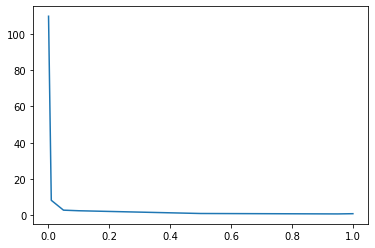

In [24]:
import matplotlib.pyplot as plt 
plt.plot(min_thresh,time_taken_hash)

In [54]:
new_redc=[]
new_redc.append(1590)
for it in time_taken_redc:
    new_redc.append(it)
    

new_redc2=[]
for i in new_redc:
    new_redc2.append(i-1280)

In [58]:
library_apriori=[
180.13214123
,9.579008102416992,
1.577028512954712,
 1.5900359153747559,
 1.6019604206085205,
 1.5640337467193604,
 1.5869648456573486]

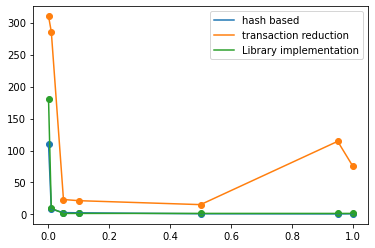

In [60]:
import matplotlib.pyplot as plt
plt.plot(min_thresh,time_taken_hash,label='hash based')
plt.scatter(min_thresh,time_taken_hash)

plt.plot(min_thresh,new_redc2,label='transaction reduction')
plt.scatter(min_thresh,new_redc2)


plt.plot(min_thresh,library_apriori,label='Library implementation')
plt.scatter(min_thresh,library_apriori)

plt.legend(loc="upper right")
plt.show()